# Test fluctuations of stroboscopic Hamiltonian elements against the high-frequency Hamiltonian

In [1]:
import numpy as np
from math import cos, sin
from numpy import pi
import scipy.integrate as integrate
from scipy.special import jv
from floquet_simulations.hamiltonians import CreateHFGeneral, RemoveWannierGauge
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.plot_functions import PlotParams, PlotAbsRealImagHamiltonian, PlotRealHamiltonian
from floquet_simulations.utilities import PhaseShiftPositive
import matplotlib.pyplot as plt
import time


In [2]:
phi3_frac = pi/7
# phi3_frac = np.round(phi3_frac, 3)
phi3 = pi*phi3_frac
omega0 = 8
omega2 = omega0
omega3 = 2*omega0
T = 2*pi/omega0
A2 = 10
A3 = 10

In [3]:
# first term expansion term
J23_real = -(1/T)*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
J23_imag = -1j*(1/T)*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
# we are removing esimate of absolute error
J23 = J23_real + J23_imag

J31_real = -(1/T)*integrate.quad(lambda t: cos(-A3/omega3*sin(omega3*t + phi3)), -T/2, T/2)[0]
J31_imag = -1j*(1/T)*integrate.quad(lambda t: sin(-A3/omega3*sin(omega3*t + phi3)), -T/2, T/2)[0]
J31 = J31_real + J31_imag

J12 = -jv(0,A2/omega2)

hf_ft_flux = np.angle(np.conj(J12)) + np.angle(np.conj(J23)) + np.angle(np.conj(J31)); hf_ft_flux = PhaseShiftPositive(hf_ft_flux)


In [4]:
centres = [1,2]
funcs= [Cosine, Cosine]
paramss = [[A2, omega2, 0, 0], [A3, omega3, phi3, 0]]
_, HF = CreateHFGeneral(3, centres, funcs, paramss, T, circle_boundary=1, t0=0)

In [5]:
if not np.isnan(HF).all():
    for site in range(3):
        HF = RemoveWannierGauge(HF, site, 3)

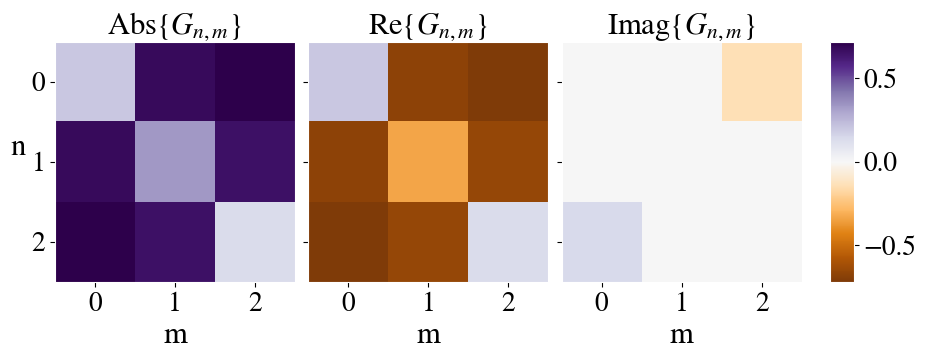

In [6]:
PlotParams(fontsize=22)
PlotAbsRealImagHamiltonian(HF)
# PlotRealHamiltonian(HF)
# PlotAbsRealImagHamiltonian(HF_FT)
# PlotRealHamiltonian(HF_FT)

In [7]:
t0_lst = np.linspace(0,1,12)
hf_flux_lst = []
for t0 in t0_lst:
    _, HF = CreateHFGeneral(3, centres, funcs, paramss, T, circle_boundary=1, t0=t0)
    hf_flux = np.angle(HF[0,1]) + np.angle(HF[1,2]) + np.angle(HF[2,0]); hf_flux = np.where(hf_flux<0 , 2*pi+hf_flux, hf_flux); hf_flux = np.where(hf_flux>2*pi , hf_flux-2*pi, hf_flux) 
    hf_flux_lst.append(hf_flux)
    

In [8]:
# calculate variations in strob flux vs high freq flux
max_flux_fluc = np.max([np.abs(np.max(hf_flux_lst)/hf_ft_flux - 1), np.abs(np.min(hf_flux_lst)/hf_ft_flux - 1)])*100

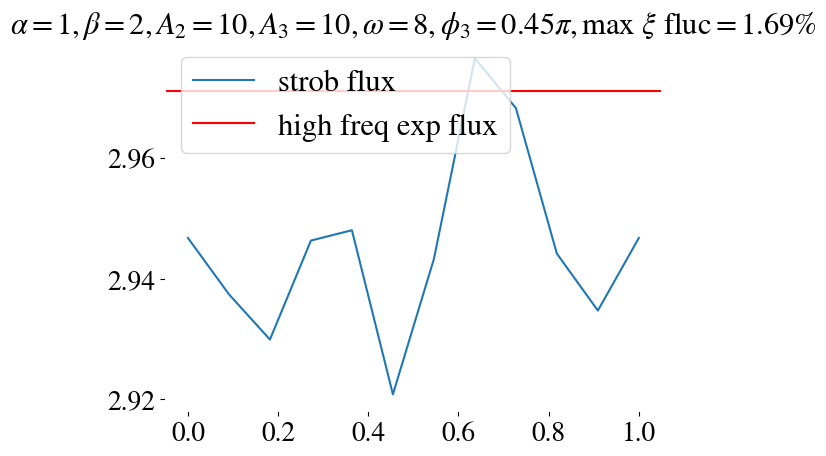

In [9]:
fig, ax = plt.subplots()
ax.plot(t0_lst, hf_flux_lst, label="strob flux")
ax.axhline(y = hf_ft_flux, color = 'r', linestyle = '-', label="high freq exp flux")
ax.legend()
ax.set_title(r"$\alpha=1, \beta=2, A_2="+str(A2)+", A_3="+str(A3)+", \omega="+str(omega0)+", \phi_3="+"{:.2f}".format(phi3_frac)+"\pi, $"+"max "+r"$\xi$"+ " fluc"+r"$ = "+"{:.2f}".format(max_flux_fluc)+ "\%$")
plt.show()

In [10]:
#set params
omega0 = 8
omega2 = omega0
omega3 = 2*omega0
T = 2*pi/omega0
centres = [1,2]
funcs= [Cosine, Cosine]
a3_time = 0

max_flux_flucs = []
for A3 in np.linspace(0,40,41):
    
    
    for A2 in np.linspace(0,40,41):
        print(A3, A2, a3_time)
        t0 = time.process_time()

        for phi3 in np.linspace(0,2*pi, 10)[1:-1]:
            # print(phi3)

            # first term expansion term
            J23_real = -(1/T)*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
            J23_imag = -1j*(1/T)*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
            # we are removing esimate of absolute error
            J23 = J23_real + J23_imag

            J31_real = -(1/T)*integrate.quad(lambda t: cos(-A3/omega3*sin(omega3*t + phi3)), -T/2, T/2)[0]
            J31_imag = -1j*(1/T)*integrate.quad(lambda t: sin(-A3/omega3*sin(omega3*t + phi3)), -T/2, T/2)[0]
            J31 = J31_real + J31_imag

            J12 = -jv(0,A2/omega2)

            hf_ft_flux = np.angle(np.conj(J12)) + np.angle(np.conj(J23)) + np.angle(np.conj(J31)); hf_ft_flux = PhaseShiftPositive(hf_ft_flux)


            paramss = [[A2, omega2, 0, 0], [A3, omega3, phi3, 0]]
            strob_fluxes = np.empty(20)
            for i, t0 in enumerate(np.linspace(0,1,20)):
                _, HF = CreateHFGeneral(3, centres, funcs, paramss, T, circle_boundary=1, t0=t0)
                strob_flux = np.angle(HF[0,1]) + np.angle(HF[1,2]) + np.angle(HF[2,0]); strob_flux = PhaseShiftPositive(strob_flux)
                strob_fluxes[i]=strob_flux


            max_flux_fluc = np.max([np.abs(np.max(strob_fluxes)/strob_fluxes - 1), np.abs(np.min(strob_fluxes)/strob_fluxes - 1)])*100
            max_flux_flucs.append(max_flux_fluc)
            
        a3_time = time.process_time() - t0

0.0 0.0 0
0.0 1.0 11.984375
0.0 2.0 19.328125
0.0 3.0 27.90625
0.0 4.0 37.828125
0.0 5.0 49.640625
0.0 6.0 62.53125
0.0 7.0 76.578125
0.0 8.0 91.640625
0.0 9.0 107.65625
0.0 10.0 124.859375
0.0 11.0 143.4375
0.0 12.0 163.3125
0.0 13.0 184.109375
0.0 14.0 206.84375
0.0 15.0 232.71875
0.0 16.0 257.59375
0.0 17.0 281.953125
0.0 18.0 308.765625
0.0 19.0 335.46875
0.0 20.0 363.21875
0.0 21.0 391.703125
0.0 22.0 421.3125
0.0 23.0 452.109375
0.0 24.0 484.15625
0.0 25.0 518.75
0.0 26.0 553.546875
0.0 27.0 590.96875
0.0 28.0 629.609375
0.0 29.0 669.625
0.0 30.0 709.75
0.0 31.0 751.859375
0.0 32.0 794.984375
0.0 33.0 838.828125
0.0 34.0 883.3125
0.0 35.0 929.671875
0.0 36.0 977.125
0.0 37.0 1024.75
0.0 38.0 1074.15625
0.0 39.0 1124.46875
0.0 40.0 1175.046875
1.0 0.0 1225.203125
1.0 1.0 1235.234375
1.0 2.0 1246.015625
1.0 3.0 1256.953125
1.0 4.0 1268.84375
1.0 5.0 1280.65625
1.0 6.0 1295.140625
1.0 7.0 1309.34375
1.0 8.0 1324.328125
1.0 9.0 1340.515625
1.0 10.0 1357.859375
1.0 11.0 1376.390625
1.

In [11]:
# print(phi3)

_, HF = CreateHFGeneral(3, centres, funcs, paramss, T, circle_boundary=1, t0=t0)
strob_flux = np.angle(HF[0,1]) + np.angle(HF[1,2]) + np.angle(HF[2,0]); strob_flux = PhaseShiftPositive(strob_flux)



In [12]:
HF

array([[ 0.0073582+0.j       ,  0.1793734+0.0137819j,
         0.0094474-0.0388601j],
       [ 0.1793734-0.0137819j,  0.0084347+0.j       ,
        -0.0614479+0.0625323j],
       [ 0.0094474+0.0388601j, -0.0614479-0.0625323j,
        -0.0157929+0.j       ]])